In [1]:
#Systems

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from numpy import linalg as la
from scipy import stats
from scipy import spatial as sp
import pandas as pd
from scipy import integrate as si

In [8]:
import Methods as m
import Reservoir_Computing as rc

In [9]:
#Creates rossler with specified parameters 
class rossler:
    def __init__(self, a = 0.2, b = 0.2, c = 5.7):
        self.a = a
        self.b = b
        self.c = c

    def f(self, x, t):
        xdot = [-x[1] - x[2], 
                x[0] + self.a*x[1], 
                self.b + x[2]*(x[0] - self.c) ]
        return np.array(xdot)
    
    def solve(self, t0, tFinal, x0, dt):
        numSteps = int((tFinal - t0)/dt)
        sol = np.zeros((3, numSteps))
        sol[:, 0] = x0

        for i in range(0, numSteps-1):
            sol[:, i+1] = m.rk4_step(x0 = sol[:, i], t0 = dt*i, dt=dt, f = self.f)
        
        return sol
        

In [10]:
r = rossler()

In [11]:
sol = r.solve(t0 = 0, tFinal=200, x0 = np.array([0, 0, 0]), dt = 0.01)

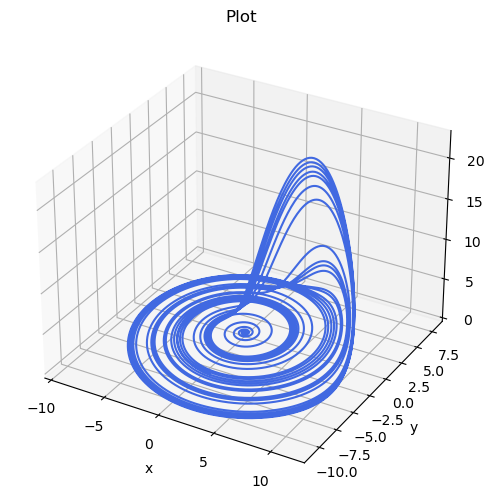

In [13]:
m.plot3D.Figsize = (6, 6)
m.plot3D.setFig()
m.plot3D.plot(sol)

In [20]:
#Coupled 2D Kuromoto

class Kuramoto2D:
    def __init__(self, sigma = 0.01, w1 = 0.4, w2 = 0.5):
        self.sigma = sigma
        self.w1 = w1
        self.w2 = w2


    def f(self, x, t):
        xdot = [self.w1 + np.sin(x[1] - x[0]), 
                self.w2 + np.sin(x[0] - x[1])]
        
        #xdot = [Kuramoto2D.w1, 
               # Kuramoto2D.w2 + np.sin(x[0] - x[1])]
        return np.array(xdot)
    
    def solve(self, t0, tFinal, x0, dt):
        numSteps = int((tFinal - t0)/dt)
        sol = np.zeros((2, numSteps))
        sol[:, 0] = x0

        for i in range(0, numSteps-1):
            sol[:, i+1] = m.rk4_step(x0 = sol[:, i], t0 = dt*i, dt=dt, f = self.f)
        
        return sol
    


In [15]:
K = Kuramoto2D(sigma = 0.01, w1 = 0.4, w2 = 0.5)

In [18]:
K1 = K.solve(t0 = 0, tFinal = 30, x0 = [0, 0], dt = 0.01)

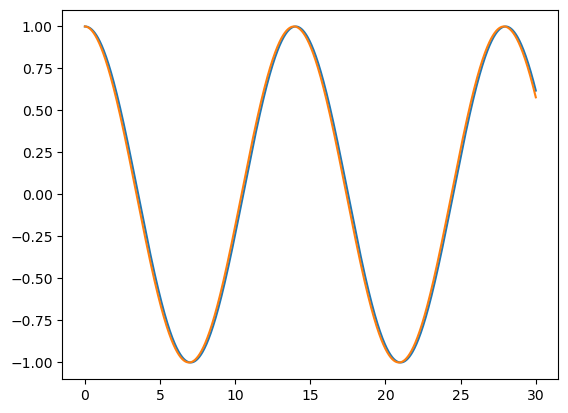

In [19]:
numSteps = int(30/0.01)
time = np.linspace(0, 30, numSteps)
plt.plot(time, np.cos(K1[0, :]))
plt.plot(time, np.cos(K1[1, :]))

In [21]:
class xCoupledRossler: #A set of coupled rosslers, coupled by x
    def __init__(self, a = 0.2, b = 0.2, c = 5.7, nu = 0, mu = 0):
        self.a = a
        self.b = b
        self.c = c
        self.nu = nu
        self.mu = mu

    def f(self, x, t):
        xdot = [
            #First System
            -1*(1 + self.nu)*x[1] - x[2] + self.mu*(x[3] - x[0]), 
                
                (1 - self.nu)*x[0] + self.a*x[1], 
                
                self.b + x[2]*(x[0] - self.c),

                #Second System
                -1*(1 + self.nu)*x[4] - x[5] + self.mu*(x[0] - x[3]), 

                (1 - self.nu)*x[3] + self.a*x[4], 

                self.b + x[5]*(x[3] - self.c)  ]
        return np.array(xdot)
    
    def solve(self, t0, tFinal, x0_1, x0_2, dt):

        numSteps = int((tFinal - t0)/dt)
        sol1 = np.zeros((6, numSteps)); #blank array

        #Initial Conditions saved as entry 0
        sol1[:, 0:3] = x0_1
        sol1[:, 3:6] = x0_2
        

        for i in range(0, numSteps-1):
            sol1[:, i+1] = m.rk4_step(x0 = sol1[:, i], t0 = dt*i, dt=dt, f = self.f)
        
        return sol1
    

In [22]:
xCR = xCoupledRossler()

In [23]:
sol = xCR.solve(t0 =  0, tFinal = 600, x0_1 = [0, 0, 0], x0_2 = [0, 0, 0], dt = 0.01)

In [24]:
sol

array([[ 0.00000000e+00, -9.81262409e-06, -3.85210994e-05, ...,
         7.54933777e+00,  7.49338824e+00,  7.43608278e+00],
       [ 0.00000000e+00, -3.28750000e-08, -2.59482890e-07, ...,
         2.61110055e+00,  2.69161810e+00,  2.77173000e+00],
       [ 0.00000000e+00,  1.94406752e-03,  3.78042155e-03, ...,
         2.91570072e+00,  2.97131438e+00,  3.02623669e+00],
       [ 0.00000000e+00, -9.81262409e-06, -3.85210994e-05, ...,
         7.54933777e+00,  7.49338824e+00,  7.43608278e+00],
       [ 0.00000000e+00, -3.28750000e-08, -2.59482890e-07, ...,
         2.61110055e+00,  2.69161810e+00,  2.77173000e+00],
       [ 0.00000000e+00,  1.94406752e-03,  3.78042155e-03, ...,
         2.91570072e+00,  2.97131438e+00,  3.02623669e+00]])

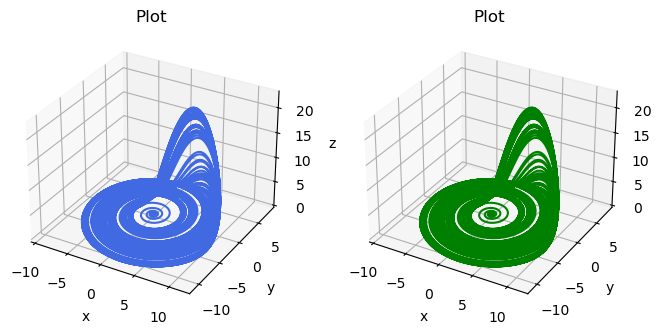

In [25]:
rc.plot3D.figCol = 2
rc.plot3D.Figsize = (8, 8)
rc.plot3D.setFig()
rc.plot3D.plot(sol[0:3, :], plotNum = 1)
rc.plot3D.plot(sol[3:6, :], plotNum=2)